<a href="https://colab.research.google.com/github/PrajnyaKulkarni/telecom_data_analysis/blob/main/Telecom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#pip install --upgrade pip

In [6]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 56.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=9964589ad77cebfd3cbee9287c0aab539faf131ffa14ad7ab2997b7cf715b0eb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


# Reading the data from the google drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np

import ydata_profiling
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv file to do EDA

In [8]:
telecom_data = pd.read_csv('/content/drive/MyDrive/raw_telecom_data.csv')

In [9]:
telecom_data.columns

Index(['Customer ID', 'Month of Joining', 'Month', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

# **Data dictionary**


* **Before analysing the data, we need to have domain knowledge.data dictionary provides this knowledge.**
* **The data dictionary is very important as it contains information such as what is in the database, Which is the primary key,Which are the foreign keys**

| Column name    | Description|
| ----- | ----- |
| Customer ID    | Unique identifier for each customer |
| Month | Calendar Month- 1:12 |
| Month of Joining |    Calender Month -1:14, Month for which the data is captured|
| zip_code |    Zip Code|
|Gender |   Gender|
| Age | Age(Years)|
| Married | Marital Status |
|Dependents | Dependents - Binary |
| Number of Dependents |    Number of Dependents|
|Location ID |  Location ID|
|Service ID  |Service ID|
|state| State|
|county |County|
|timezone   |Timezone|
|area_codes|    Area Code|
|country    |Country|
|latitude|  Latitude|
|longitude  |Longitude|
|arpu|  Average revenue per user|
|roam_ic    |Roaming incoming calls in minutes|
|roam_og    |Roaming outgoing calls in minutes|
|loc_og_t2t|    Local outgoing calls within same network in minutes|
|loc_og_t2m |Local outgoing calls outside network in minutes(outside same + partner network)|
|loc_og_t2f|    Local outgoing calls with Partner network in minutes|
|loc_og_t2c |Local outgoing calls with Call Center in minutes|
|std_og_t2t|    STD outgoing calls within same network in minutes|
|std_og_t2m|    STD outgoing calls outside network in minutes(outside same + partner network)|
|std_og_t2f|    STD outgoing calls with Partner network in minutes|
|std_og_t2c |STD outgoing calls with Call Center in minutes|
|isd_og|    ISD Outgoing calls|
|spl_og |Special Outgoing calls|
|og_others| Other Outgoing Calls|
|loc_ic_t2t|    Local incoming calls within same network in minutes|
|loc_ic_t2m|    Local incoming calls outside network in minutes(outside same + partner network)|
|loc_ic_t2f |Local incoming calls with Partner network in minutes|
|std_ic_t2t |STD incoming calls within same network in minutes|
|std_ic_t2m |STD incoming calls outside network in minutes(outside same + partner network)|
|std_ic_t2f|    STD incoming calls with Partner network in minutes|
|std_ic_t2o|    STD incoming calls operators other networks in minutes|
|spl_ic|    Special Incoming calls in minutes|
|isd_ic|    ISD Incoming calls in minutes|
|ic_others| Other Incoming Calls|
|total_rech_amt|    Total Recharge Amount in Local Currency|
|total_rech_data|   Total Recharge Amount for Data in Local Currency
|vol_4g|    4G Internet Used in GB|
|vol_5g|    5G Internet used in GB|
|arpu_5g|   Average revenue per user over 5G network|
|arpu_4g|   Average revenue per user over 4G network|
|night_pck_user|    Is Night Pack User(Specific Scheme)|
|fb_user|   Social Networking scheme|
|aug_vbc_5g|    Volume Based cost for 5G network (outside the scheme paid based on extra usage)|
|offer| Offer Given to User|
|Referred a Friend| Referred a Friend : Binary|
|Number of Referrals|   Number of Referrals|
|Phone Service| Phone Service: Binary|
|Multiple Lines|    Multiple Lines for phone service: Binary|
|Internet Service|  Internet Service: Binary|
|Internet Type| Internet Type|
|Streaming Data Consumption|    Streaming Data Consumption|
|Online Security|   Online Security|
|Online Backup| Online Backup|
|Device Protection Plan|    Device Protection Plan|
|Premium Tech Support|  Premium Tech Support|
|Streaming TV|  Streaming TV|
|Streaming Movies|  Streaming Movies|
|Streaming Music|   Streaming Music|
|Unlimited Data|    Unlimited Data|
|Payment Method|    Payment Method|
|Status ID| Status ID|
|Satisfaction Score|    Satisfaction Score|
|Churn Category|    Churn Category|
|Churn Reason|  Churn Reason|
|Customer Status|   Customer Status|
|Churn Value|   Binary Churn Value

In [10]:
telecom_data.shape

(653753, 74)

This data contains 6,53,753 rows and 74 columns

In [11]:
pd.set_option('display.max_columns', None)
telecom_data.head()

Customer ID  Month of Joining  Month  zip_code  Gender  Age Married  \
0  hthjctifkiudi0                 1      1     71638  Female   36      No   
1  uqdtniwvxqzeu1                 6      6     72566    Male    1      No   
2  uqdtniwvxqzeu1                 6      7     72566    Male    1      No   
3  uqdtniwvxqzeu1                 6      8     72566    Male    1      No   
4  uqdtniwvxqzeu1                 6      9     72566    Male    1      No   

  Dependents  Number of Dependents    Location ID           Service ID state  \
0         No                     0  jeavwsrtakgq0  bfbrnsqreveeuafgps0    AR   
1         No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
2         No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
3         No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
4         No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   

          county         timezone  area_codes country  latitude  longitude  \
0  Chicot County  America/Chicago       870.0      US     33.52     -91.43   
1   Izard County  America/Chicago       870.0      US     36.22     -92.08   
2   Izard County  America/Chicago       870.0      US     36.22     -92.08   
3   Izard County  America/Chicago       870.0      US     36.22     -92.08   
4   Izard County  America/Chicago       870.0      US     36.22     -92.08   

     arpu  roam_ic  roam_og  loc_og_t2t  loc_og_t2m  loc_og_t2f  loc_og_t2c  \
0  273.07    18.88    78.59      280.32       30.97        5.71        1.79   
1 -329.96    69.46    72.08      255.73      148.80       30.00        7.61   
2  101.22  1012.60   115.26       52.95         NaN      103.28       15.71   
3  215.48    84.18    99.85      140.51     4006.99      280.86        6.33   
4  636.55     0.00     0.00        0.00        0.00       45.00        0.00   

   std_og_t2t  std_og_t2m  std_og_t2f  std_og_t2c  isd_og  spl_og   og_others  \
0       25.71      175.56        0.47         0.0    5.11    0.65       13.99   
1      308.29      265.20       10.82         0.0    1.23  905.51        1.69   
2      244.20       15.19         NaN         NaN   13.14  455.15      115.63   
3      346.14      103.15      183.53         0.0   33.88  495.60       14.01   
4        0.00        0.00       45.00         0.0    0.00    0.00  8787978.00   

   loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  std_ic_t2t  std_ic_t2m  std_ic_t2f  \
0      121.51      168.40       67.61      115.69       52.22       18.71   
1      212.93      155.19       29.04        9.15       38.89        0.84   
2      121.80      699.39       44.49       83.59      914.70       13.25   
3      658.96      195.02      144.11       50.18        2.35      623.94   
4      138.85      201.92       19.89       15.91       23.78       16.01   

   std_ic_t2o  spl_ic  isd_ic  ic_others total_rech_amt total_rech_data  \
0         0.0    0.26   11.53      46.42             18             NaN   
1         0.0    0.05   32.51      25.53           1183               0   
2         0.0    0.06   13.05       5.62            295               7   
3         0.0    0.07   69.13      10.62            354               1   
4         0.0    0.03   64.35      36.18              0             NaN   

   vol_4g  vol_5g  arpu_5g  arpu_4g  night_pck_user  fb_user  aug_vbc_5g  \
0   38.30  219.25      NaN      NaN             NaN      NaN      214.99   
1    0.00    0.00     0.00     0.00             0.0      1.0        0.00   
2   14.83  967.95    -9.40   106.30             1.0      1.0       85.87   
3  264.90  268.11    -5.15    77.53             0.0      1.0      268.38   
4   52.78  370.59      NaN      NaN             NaN      NaN      399.84   

   Churn Value Referred a Friend  Number of Referrals Phone Service  \
0            1               Yes                  9.0           Yes   
1            0                No                  0.0           Yes   
2            0               Yes               

In [12]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month of Joining            653753 non-null  int64  
 2   Month                       653753 non-null  int64  
 3   zip_code                    653753 non-null  int64  
 4   Gender                      643729 non-null  object 
 5   Age                         653753 non-null  int64  
 6   Married                     639377 non-null  object 
 7   Dependents                  629129 non-null  object 
 8   Number of Dependents        653753 non-null  int64  
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      652835 non-null  object 
 13  timezone      

# Exploratory data analysis

In [13]:
profile = ProfileReport(telecom_data, minimal=True)
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile

##Observations:

**From above profiling we can make following observations:**
* **There are 74 variables ans 653753 observations.There are 9.2% of cells missing in the data.There are 31 text variables and 43 numeric variables.**
1. **Customer ID column is text data type and there are only 98230 distinct values. So it's not unique identifier for all the observations.There are no null values here.**
2. **Month of joining is numeric.It has 12 distinct values.It doesn't have any missing values.From the histogram, we can see that Maximum people joined in June and very less people joined in the month of December.The data is normally distributed.So no outliers present in this column.**
3. **The month column is numeric and it has 14 distinct values which is unusual.Skewness value and the histogram show that the data is slightly negatively skewed.So the outliers may be present on the lower side of the data.**
4. **The zip_code column is having 4528 distinct values.There are no null values.The skewness is negative. So there may be outliers in the lower side of the data.**
5. **The Gender column is text data type.There are 4 distinct values:Male,Female,Not specified and Other.Here 1.5% of the values are missing.Female are more than male followed by other values.Other is mentioned least times.**
6. **The age column is numeric datatype.There are 64 distinct values.Here the minimum values is 1 and maximum value is 9999 which is unusual.Skewness is 18. So we can say that there more number of outliers on the upper side of datapoints.There are more people of age 15 and very less people of age 1(Which is an outlier).**
7. **The married column is having 3 distinct values:Yes,No,Not specified.There are more married people in the dataset.There are 2.2% of values missing in this column.**
8. **The dependent column is text datatype. It has 3 distinct values:Yes, No and Not specified.Here,3.8% of values are missing.**
9. **The number of dependents column is numeric data type.There are 10 distinct values in this column.minimum value is 0 and maximum value is 699.No missing values are there in this column.Skewness value is 11.34 and thus the outliers are present on the upper side.0 is most frequent value and 699 is found very less in the dataset.**
10. **Location ID column is text datatype.Here,there are 98230 unique values.There are no null values.**
11. **Service ID is also a text datatype.Here also there are 98230 unique values.No null values are there here also**
12. **In the state column which is text datatype, There are 4 distinct values and no missing values.**
13. **Here, County(region) column is text datatype.There are 193 distinct values.0.1% of values are missing in this column.**
14. **In this column, the time zone is text datatype. There are 3 distinct values and they are, America/Denver, America/los_angeles, America/chicago, There are about 0.1% missing values.AMerica/los_angeles is the most frequent value(74.8%). America/denver appeared very less in the dataset(9.4%).**
15. **The area_code column is numeric and there are 6.1% missing.There are 174 distinct values in this column. The data is positively skewed and therefore there may be some outliers on the right side.There are most number of people from area_code 870.**
16. **The data is taken from the country "US".So country column only contains one value "US"**
17. **The latitude column is numeric.It has 1096 distinct values and no missing values.Skewness is 1.2. So there may be outliers on the positive side.**









How many customers are joining each month?

<Axes: xlabel='Month of Joining', ylabel='count'>

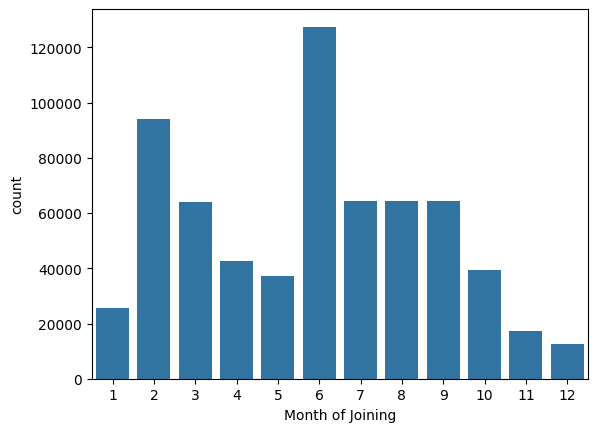

In [22]:
#This can also be found using the histogram in the ydata profiling
sns.countplot(x='Month of Joining',y=None,data = telecom_data,color='tab:blue')

Here we can see that Most of the customers have joined in the month of June and least number of customers joined in the month of December.


Distribution of customers across months

Plot graph so we can see that the number of customers steadily increases from which month to which month.

Want to know steady increase and decreasing trend

Compute basic statistics of the count of rows per customer.

Provide number of unique zip codes in the dataset


Provide number of customers in each zip code

Summary statistics of the number of customers per zip code

Plot the distribution of customers across zip codes